# Test get image location

In [1]:
# import pyautogui
# # window.activate()
# box = pyautogui.locateOnScreen(f"figures_lap/generaltraining/hi_g.png", confidence=0.6)
# left, top, width, height = box
# print(f"Left: {left}, Top: {top}, Width: {width}, Height: {height}")

In [2]:
pyautogui.leftClick(left, top)

NameError: name 'pyautogui' is not defined

# Resize game window

In [1]:
import time
import pygetwindow as gw
import pyautogui

In [2]:
windows = gw.getAllTitles()


window_title = "Umamusume"
window = gw.getWindowsWithTitle(window_title)[0]

# Get the original size and aspect ratio
original_width, original_height = window.width, window.height
aspect_ratio = original_width / original_height

# Resize the window to a new width while maintaining the aspect ratio
new_width = 1440
new_height = int(new_width / aspect_ratio)

# Apply the new size to the window
window.resizeTo(new_width, new_height)
print(f"New size: {new_width}x{new_height} (Tỉ lệ {aspect_ratio:.2f})")

width, height = window.width, window.height
left, top = window.left, window.top
print(f"Position and size: {left}, {top}, {width}, {height}")

New size: 1440x834 (Tỉ lệ 1.73)
Position and size: 1206, 221, 1440, 834


In [ ]:
def check_internet():
    ...

# Test mouse position

In [ ]:
import pyautogui
def get_mouse_position():
    """Get the current mouse position.
    FOR TEST/LABEL ONLY
    """
    return pyautogui.position()

### Lấy vị trí tương đối so với UI

In [ ]:
x, y = get_mouse_position()
print([x-left, y-top])

[634, 752]


### Lấy vị trí tương đối so với toàn màn hình

In [ ]:
x, y = get_mouse_position()
print([x, y])

[1790, 219]


In [ ]:
top, left = 1691, 185
bottom, right = 1790, 219

In [ ]:
def click_game(x, y, delay=0.5):
    """Click at the specified position in the game window."""
    pyautogui.click(left + x, top + y)
    time.sleep(delay)
    # check_internet()

In [ ]:
click_game(450,700)

In [ ]:
import pygetwindow as gw
import pyautogui

# Find the window by its title
window_title = "Umamusume"
windows = gw.getWindowsWithTitle(window_title)

# Import library

In [1]:
from control_laptop import UmaGame, identify_image
import pygetwindow as gw

support_card = ("Silence Suzuka spe", "Tokai Teio spe", "Mejiro McQueen sta", "Super Creek sta", "Daiwa Scarlet wit", "Kita Black spe")

game = UmaGame(test=1, support_card=support_card)



Initialize logger for main
Continue to next turn.


In [ ]:

game.train_horse_loop("Oguri Cup", turn=3)

2025-07-15 06:53:01,689 - main - DEBUG - Turn 3: No choice event.
2025-07-15 06:53:02,686 - main - DEBUG - Turn 3: No main race today.
2025-07-15 06:53:03,111 - main - DEBUG - Turn 3: Status good today.
2025-07-15 06:53:05,687 - main - INFO - Turn 3: Raise mood by recreation.
2025-07-15 06:53:15,021 - main - DEBUG - Turn 4: No choice event.
2025-07-15 06:53:15,829 - main - DEBUG - Turn 4: No main race today.
2025-07-15 06:53:16,259 - main - DEBUG - Turn 4: Status good today.


In [2]:
game._check_multiq()

2025-07-21 10:24:41,859 - main - INFO - Turn 0: Find choice event.
2025-07-21 10:24:42,683 - main - INFO - Turn 0: Event name detected: Paying It Forward
2025-07-21 10:24:45,300 - main - INFO - Turn 0: Special event Paying It Forward detected, choice 1 selected.
2025-07-21 10:24:45,635 - main - INFO - Turn 0: Find choice event.
2025-07-21 10:24:46,313 - main - INFO - Turn 0: Event name detected: Paying It Forward
2025-07-21 10:24:48,930 - main - INFO - Turn 0: Special event Paying It Forward detected, choice 1 selected.
2025-07-21 10:24:49,271 - main - INFO - Turn 0: Find choice event.
2025-07-21 10:24:50,015 - main - INFO - Turn 0: Event name detected: Paying It Forward
2025-07-21 10:24:52,619 - main - INFO - Turn 0: Special event Paying It Forward detected, choice 1 selected.
2025-07-21 10:24:52,620 - main - INFO - Turn 0: Special event detected.


In [ ]:
for character in support_card:
    print(character)
    try:
        character_events = game.all_support_card[character] 
        for event_name, event_data in character_events.items():
            special_events[event_name] = event_data
    except KeyError as e:
        print(e)

Silence Suzuka spe
Tokai Teio spe
Mejiro McQueen sta
Super Creek sta
Daiwa Scarlet wit
Kita Black spe


In [9]:
for event_name, event_data in game.all_support_card['Silence Suzuka spe'].items():
    print(event_name, event_data)

On and On {'selectable': 1, 'choice_1': {'Stat': {'Speed': 10, 'Stamina': 5}, 'bond': 5}, 'choice_2': {'Stat': {'Speed': 15}, 'bond': 5}}
What Should I Do? {'selectable': 1, 'choice_1': {'Stat': {'Speed': 5, 'Stamina': 5, 'Wisdom': 5}, 'bond': 5}, 'choice_2': {'skill': 'Left-Handed', 'bond': 5}}


In [5]:
'Kita Black spe' in game.all_support_card

True

In [ ]:
identify_image("tlcorner", confi=0.5)

In [ ]:
pyautogui.click(857.5, 176.5)

# Test tính năng trích văn bản

## Setup function and library

In [ ]:
import cv2
import time
import pyautogui
import pytesseract
import pygetwindow as gw

from control_laptop import UmaGame, identify_image
from concurrent.futures import ThreadPoolExecutor

pytesseract.pytesseract.tesseract_cmd = r"C://Program Files//Tesseract-OCR//tesseract.exe"


game = UmaGame(test=1)

# Chụp ảnh màn hình và lưu với tên tự động theo thời gian
def capture_screen():
    # Tạo tên file tự động theo thời gian
    filename = f"test/test.png"
    
    # Chụp ảnh màn hình
    screenshot = pyautogui.screenshot(region=(game.x, game.y, game.w, game.h))
    
    # Lưu ảnh
    screenshot.save(filename)
    # print(f"Đã lưu ảnh chụp màn hình thành: {filename}")

Initialize logger for main
Continue to next turn.


In [ ]:
a, b = identify_image("generaltraining/hi_g", 0.90)
a - game.x, b - game.y

(np.float64(225.0), np.float64(503.5))

In [ ]:
windows = gw.getAllTitles()

window = gw.getWindowsWithTitle("Umamusume")[0]

width, height = window.width, window.height
left, top = window.left, window.top
print(f"Position and size: {left}, {top}, {width}, {height}")

Position and size: 1470, 150, 1440, 832


In [ ]:
# Gọi hàm chụp ảnh
start = time.time()
capture_screen()
end = time.time()
print(f"Thời gian chụp ảnh: {end - start:.2f} giây")

Thời gian chụp ảnh: 0.57 giây


In [ ]:

start = time.time()

# Đọc ảnh
image = cv2.imread('test/test.png')

# Tọa độ 2 góc hình chữ nhật của vùng cần OCR (vd)
x1, y1 = 127, 155
x2, y2 = 187, 215

# Cắt vùng ảnh
x_start, x_end = min(x1, x2), max(x1, x2)
y_start, y_end = min(y1, y2), max(y1, y2)
cropped_img = image[y_start:y_end, x_start:x_end]

text = pytesseract.image_to_string(cropped_img, lang='eng')  # hoặc lang='vie' nếu có

end = time.time()
print(f"Time taken: {end - start:.2f} seconds")

print(text)

Time taken: 0.57 seconds



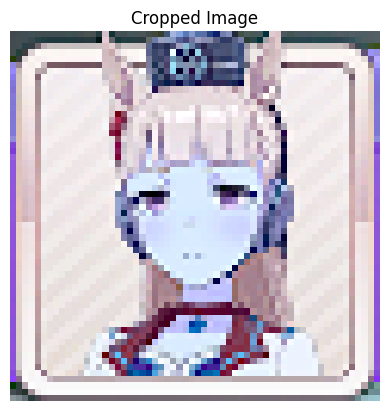

In [ ]:
import matplotlib.pyplot as plt

# Display the cropped image
plt.imshow(cropped_img)
plt.axis('off')  # Turn off axis labels
plt.title("Cropped Image")
plt.show()

In [ ]:
import pyautogui
def get_mouse_position():
    """Get the current mouse position.
    FOR TEST/LABEL ONLY
    """
    return pyautogui.position()

In [ ]:
x1, y1 = get_mouse_position()
print([x1 - game.x, y1 - game.y])

[190, 162]


In [ ]:
x2, y2 = get_mouse_position()
print([x2 - game.x, y2 - game.y])

[462, 205]


In [ ]:
1176-1094

82

In [ ]:
print(result)

[([[np.int32(6), np.int32(6)], [np.int32(94), np.int32(6)], [np.int32(94), np.int32(30)], [np.int32(6), np.int32(30)]], 'Sinh nhật', np.float64(0.7372608608279182))]


Đã lưu ảnh chụp màn hình thành: test/test.png
